In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip3 -q install numpy pandas matplotlib seaborn geopy folium datetime scipy

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

from math import radians, cos,sin,asin,sqrt

import folium
from folium.plugins import HeatMap

import datetime
from scipy.stats import ttest_ind

import matplotlib
matplotlib.rcParams.update({'font.size':12})

In [6]:
ud = pd.read_csv('D:\\Data Science\\Python\\Projects\\Uber Trips Analysis\\data\\uber-raw-data-aug14.csv')

In [7]:
display(ud.head(10))

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
5,8/1/2014 0:13:00,40.7349,-74.0033,B02512
6,8/1/2014 0:15:00,40.7279,-73.9542,B02512
7,8/1/2014 0:17:00,40.7210,-73.9937,B02512
8,8/1/2014 0:19:00,40.7195,-74.0060,B02512
9,8/1/2014 0:20:00,40.7448,-73.9799,B02512


In [8]:
print(ud.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  829275 non-null  object 
 1   Lat        829275 non-null  float64
 2   Lon        829275 non-null  float64
 3   Base       829275 non-null  object 
dtypes: float64(2), object(2)
memory usage: 25.3+ MB
None


#### Q1. On what date did we see the most number of Uber pickups?
**Skill Test:** Grouping & Counting

In [9]:
# Convert the 'Date/Time' column to datetime format
print(type(ud.loc[0,'Date/Time']))

<class 'str'>


In [10]:
ud['Date/Time'] = pd.to_datetime(ud['Date/Time'])

In [11]:
# Group by date and count the number of pickups
ud['Date/Time'] = pd.to_datetime(ud['Date/Time'])
pickup_counts = ud.groupby(['Date/Time']).size().reset_index(name='pickup_count')
print(pickup_counts)

                Date/Time  pickup_count
0     2014-08-01 00:00:00            23
1     2014-08-01 00:01:00            15
2     2014-08-01 00:02:00            11
3     2014-08-01 00:03:00            19
4     2014-08-01 00:04:00            13
...                   ...           ...
44427 2014-08-31 23:55:00            18
44428 2014-08-31 23:56:00            17
44429 2014-08-31 23:57:00            11
44430 2014-08-31 23:58:00            17
44431 2014-08-31 23:59:00            11

[44432 rows x 2 columns]


In [12]:
# Find the date with the highest number of pickups

ud['Date/Time'] = pd.to_datetime(ud['Date/Time'])
ud_counts = ud.groupby("Date/Time").size()
date_high_pickup = ud_counts.idxmax()
print(date_high_pickup)

2014-08-12 18:35:00


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [13]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
ud['Date/Time'] = pd.to_datetime(ud['Date/Time'])
new_ud = (ud['Date/Time']>'08-01-2014')&(ud['Date/Time']<='08-31-2014')
new_ud = ud.loc[new_ud]
print(new_ud)

                 Date/Time      Lat      Lon    Base
0      2014-08-01 00:03:00  40.7366 -73.9906  B02512
1      2014-08-01 00:09:00  40.7260 -73.9918  B02512
2      2014-08-01 00:12:00  40.7209 -74.0507  B02512
3      2014-08-01 00:12:00  40.7387 -73.9856  B02512
4      2014-08-01 00:12:00  40.7323 -74.0077  B02512
...                    ...      ...      ...     ...
826226 2014-08-31 00:00:00  40.7188 -73.9624  B02764
826227 2014-08-31 00:00:00  40.8064 -73.9529  B02764
826228 2014-08-31 00:00:00  40.7472 -73.9565  B02764
826229 2014-08-31 00:00:00  40.7843 -73.9769  B02764
826230 2014-08-31 00:00:00  40.6192 -73.9938  B02764

[805999 rows x 4 columns]


In [14]:
# Get the count of pickups on the highest date
max_date = ud['Date/Time'].max()
count_max_date = ud[ud['Date/Time']==max_date]['Base'].sum()
print(count_max_date)

B02512B02598B02598B02617B02617B02617B02617B02682B02682B02764B02764


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [15]:
# Count the number of unique TLC base companies
ud_unique = ud['Base'].nunique()
ud_unique

5

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [16]:
# Group by TLC base company and count the number of pickups
comp_ud = ud.groupby('Base')['Date/Time'].count()
comp_ud = comp_ud.sort_values(ascending=False)
print(comp_ud)

Base
B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Date/Time, dtype: int64


In [17]:
# Find the TLC base company with the highest number of pickups
ud_high = ud.groupby('Base').size()
print(ud_high)

Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [18]:
# Group by TLC base company and count the number of pickups
ud['Date/Time'] = pd.to_datetime(ud['Date/Time'])
pickup_counts = ud.groupby(['Date/Time']).size()
date_with_high_pickups = pickup_counts.idxmax()
print(date_with_high_pickups)

2014-08-12 18:35:00


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [19]:
# Extract the hour from the 'Date/Time' column
ud['Data/Time'] = pd.to_datetime(ud['Date/Time'])
ud['Hour'] = ud['Date/Time'].dt.hour
print(ud)

                 Date/Time      Lat      Lon    Base           Data/Time  Hour
0      2014-08-01 00:03:00  40.7366 -73.9906  B02512 2014-08-01 00:03:00     0
1      2014-08-01 00:09:00  40.7260 -73.9918  B02512 2014-08-01 00:09:00     0
2      2014-08-01 00:12:00  40.7209 -74.0507  B02512 2014-08-01 00:12:00     0
3      2014-08-01 00:12:00  40.7387 -73.9856  B02512 2014-08-01 00:12:00     0
4      2014-08-01 00:12:00  40.7323 -74.0077  B02512 2014-08-01 00:12:00     0
...                    ...      ...      ...     ...                 ...   ...
829270 2014-08-31 23:55:00  40.7552 -73.9753  B02764 2014-08-31 23:55:00    23
829271 2014-08-31 23:55:00  40.7552 -73.9753  B02764 2014-08-31 23:55:00    23
829272 2014-08-31 23:55:00  40.7617 -73.9788  B02764 2014-08-31 23:55:00    23
829273 2014-08-31 23:59:00  40.7395 -73.9889  B02764 2014-08-31 23:59:00    23
829274 2014-08-31 23:59:00  40.7270 -73.9802  B02764 2014-08-31 23:59:00    23

[829275 rows x 6 columns]


In [20]:
# Group by hour and count the number of pickups
ud['Date/Time'] = pd.to_datetime(ud['Date/Time'])
ud['hour'] = ud['Date/Time'].dt.hour
hourly_pickup_= ud.groupby('Hour').size().reset_index(name="Pickup_Count")
print(hourly_pickup_)

    Hour  Pickup_Count
0      0         21451
1      1         14471
2      2         10105
3      3         10376
4      4         11774
5      5         16525
6      6         24907
7      7         34064
8      8         34566
9      9         30195
10    10         30706
11    11         31778
12    12         32106
13    13         35764
14    14         40644
15    15         48197
16    16         53481
17    17         57122
18    18         55390
19    19         53008
20    20         51674
21    21         51354
22    22         46008
23    23         33609


In [21]:
# Find the hour with the highest number of pickups
ud['Date/Time'] = pd.to_datetime(ud['Date/Time'])
ud['hour'] = ud['Date/Time'].dt.hour
hourly_pickup_= ud.groupby('Hour').size()
hourly_high_pickup = hourly_pickup_.idxmax()
print(hourly_high_pickup)

17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

<function matplotlib.pyplot.show(close=None, block=None)>

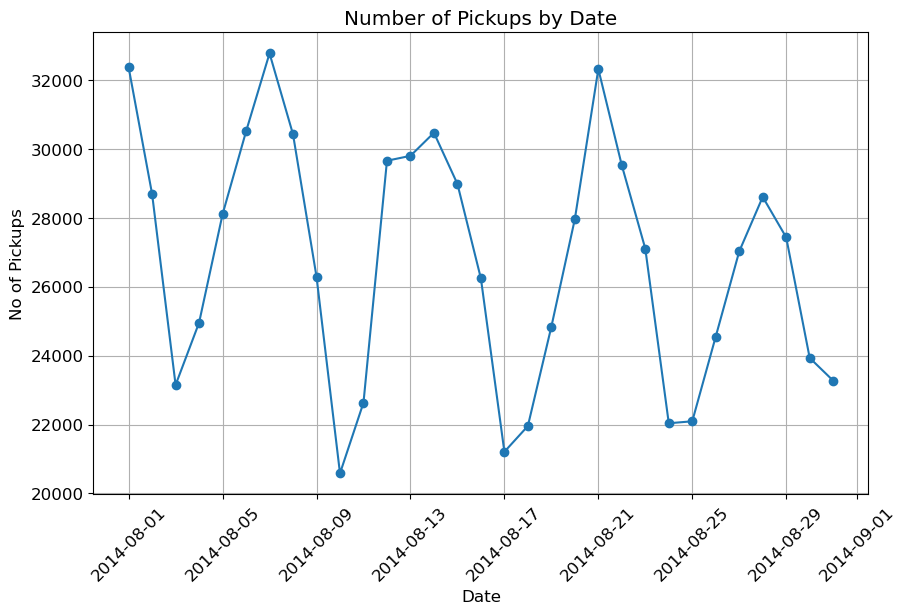

In [22]:
# Group by date and count the number of pickups
ud['Date/Time'] = pd.to_datetime(ud['Date/Time'])
ud['Date'] = ud['Date/Time'].dt.date
daily_pickup_counts = ud.groupby('Date').size().reset_index(name="Pickup_count")
plt.figure(figsize=(10,6))
plt.plot(daily_pickup_counts['Date'],daily_pickup_counts['Pickup_count'],marker='o')
plt.title('Number of Pickups by Date')
plt.xlabel('Date')
plt.ylabel('No of Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

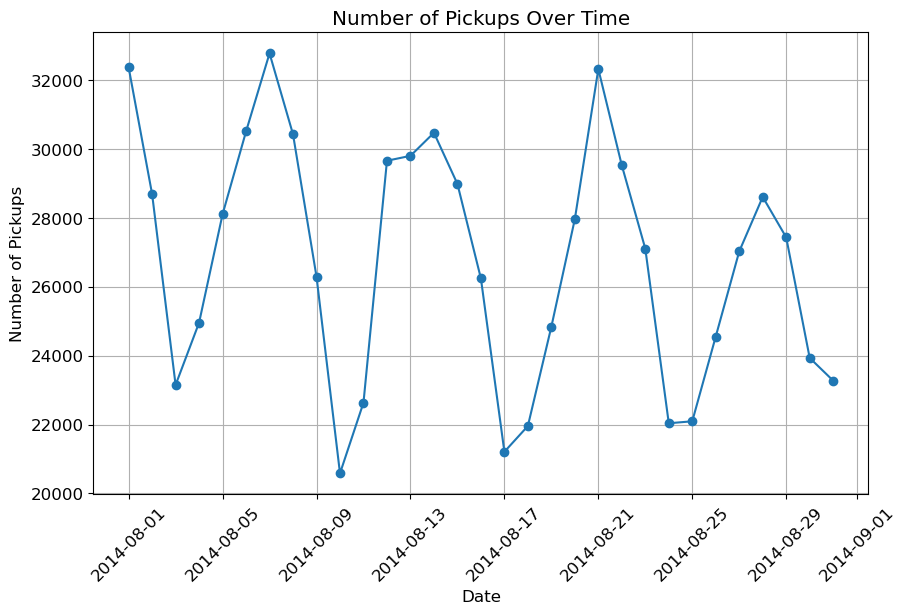

In [23]:
# Create a line plot to visualize the number of pickups over time
ud['Data/Time'] = pd.to_datetime(ud['Date/Time'])
ud['Date'] = ud['Date/Time'].dt.date
ud['Time'] = ud['Date/Time'].dt.time
daily_pickup_counts = ud.groupby('Date').size().reset_index(name='Pickup_Count')
plt.figure(figsize=(10,6))
plt.plot(daily_pickup_counts['Date'],daily_pickup_counts['Pickup_Count'],marker = 'o')
plt.title('Number of Pickups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

<function matplotlib.pyplot.show(close=None, block=None)>

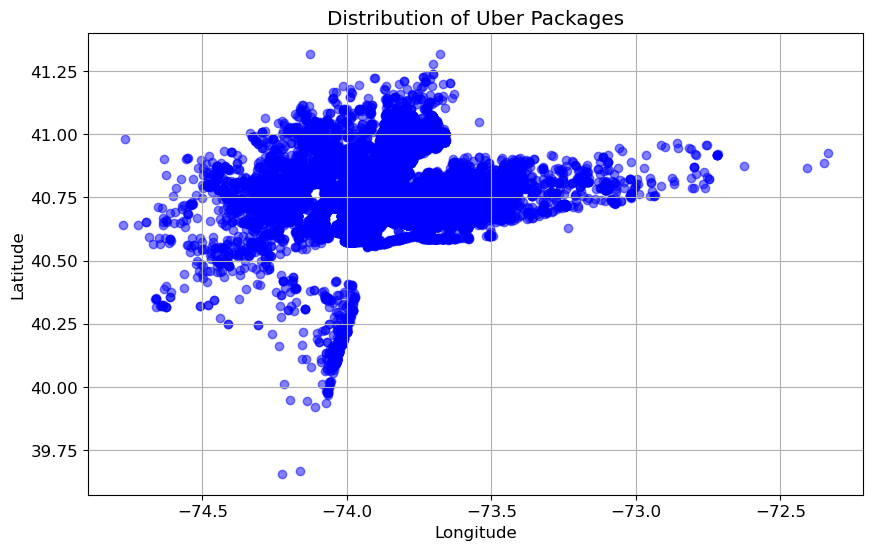

In [24]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize = (10, 6))
plt.scatter(ud['Lon'],ud['Lat'],color='blue',alpha=0.5)
plt.title('Distribution of Uber Packages')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

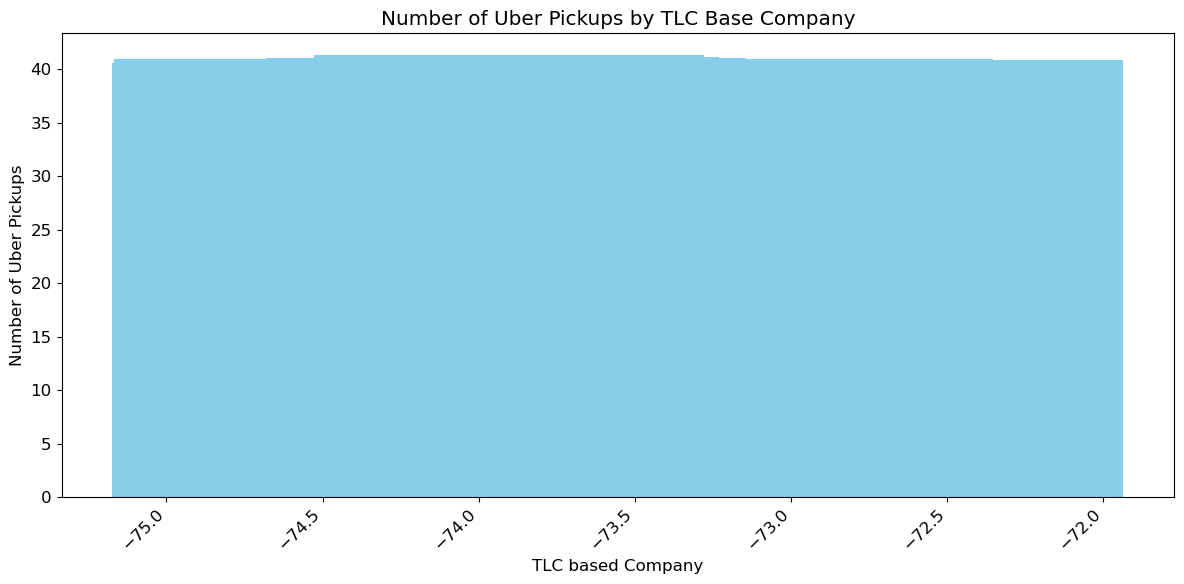

In [29]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
plt.figure(figsize=(12,6))
plt.bar(ud['Lon'],ud['Lat'],color='skyblue')
plt.xlabel('TLC based Company')
plt.ylabel('Number of Uber Pickups')
plt.title('Number of Uber Pickups by TLC Base Company')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

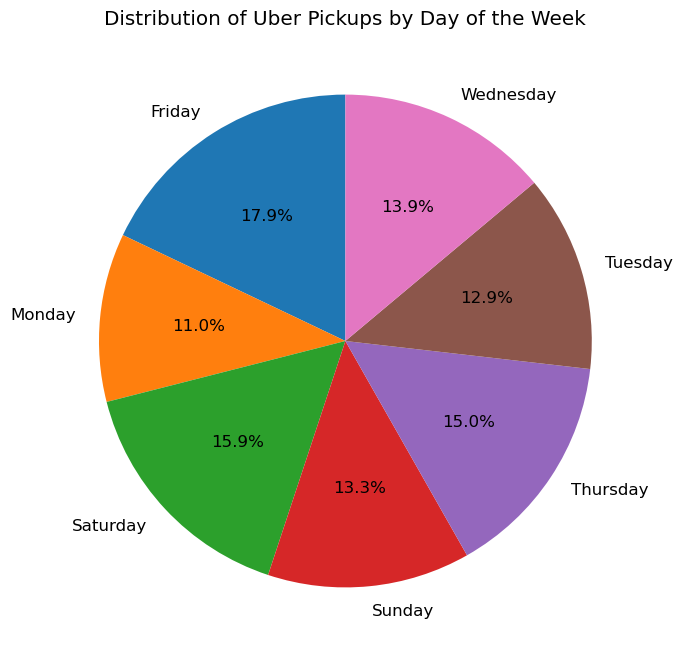

In [28]:
# Group by day of the week and count the number of pickups
ud['Date/Time'] = pd.to_datetime(ud['Date/Time'])
pickup_counts = ud.groupby(ud['Date/Time'].dt.day_name()).size()
plt.figure(figsize=(8,8))
plt.pie(pickup_counts,labels = pickup_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Uber Pickups by Day of the Week')
plt.show()

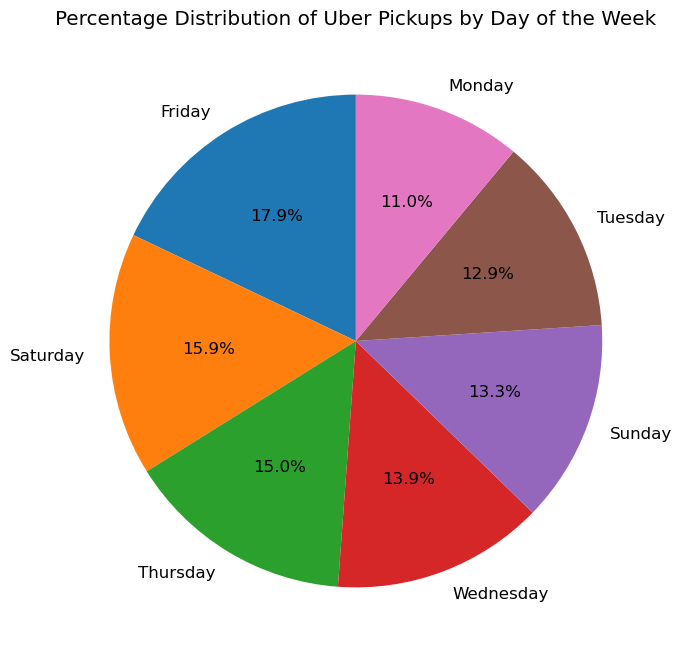

In [33]:
# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
ud['Dat/Time'] = pd.to_datetime(ud['Date/Time'])
pickup_counts = ud['Date/Time'].dt.day_name().value_counts(normalize = True) *100
plt.figure(figsize=(8,8))
plt.pie(pickup_counts,labels=pickup_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')
plt.show()